<a href="https://colab.research.google.com/github/SaraPMC/fiap-ml-visao-computacional-detector-liveness/blob/main/deteccao_liveness_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas. 

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial. 

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness/blob/master/notebook/imagens/liveness.jpg?raw=1">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes             | RM            | Turma |
| :-----------------------         | :------------ | :-----: |
| Alberto de Andrade Pinheiro      | RM 343660     | 22IA |
| Henrique dos Santos Oliveira     | RM 342794     | 22IA |
| Igor Johann Pereira Levino       | RM 342535     | 22IA |
| Sara Pinheiro Maldonado Cantão   | RM 337029     | 22IA |

In [ ]:
#IDENTIFICAÇÃO DE FACES
#DETECÇÃO DE FACES
2.5

2.5

In [2]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

In [1]:
!git clone https://github.com/SaraPMC/fiap-ml-visao-computacional-detector-liveness.git

fatal: destination path 'fiap-ml-visao-computacional-detector-liveness' already exists and is not an empty directory.


In [3]:
imagem = cv2.imread("/content/fiap-ml-visao-computacional-detector-liveness/BaseFotos/imagens/px-woman-smilings.jpg")

imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

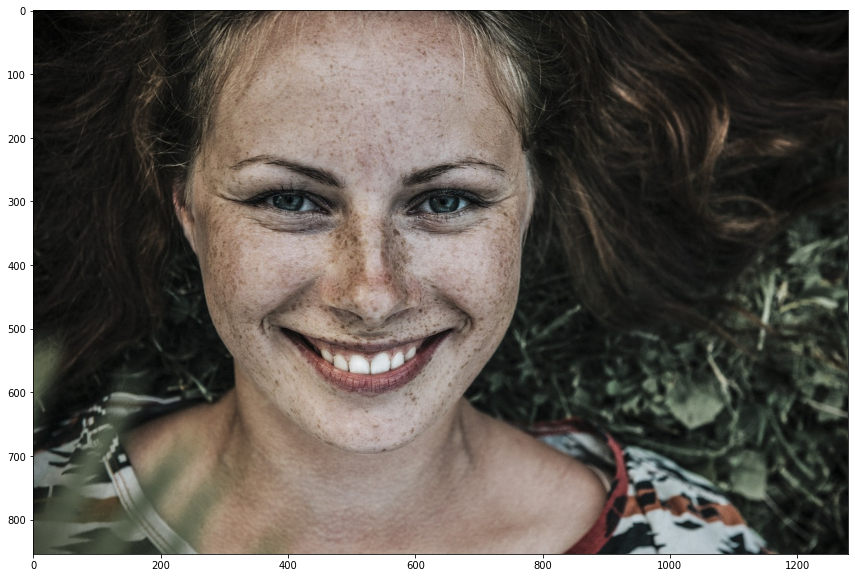

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(imagem)

In [15]:
classificador_dlib_68_path = "/content/fiap-ml-visao-computacional-detector-liveness/BaseFotos/classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

In [7]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagem

In [16]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


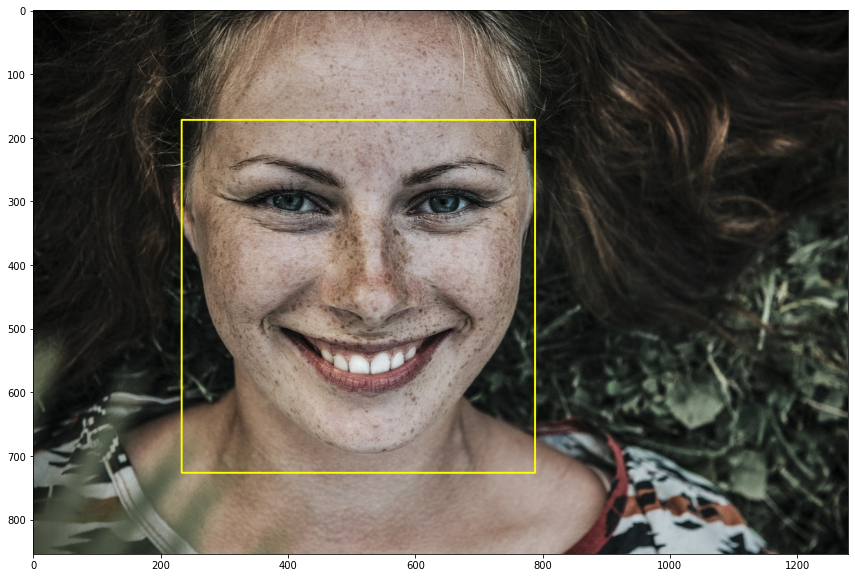

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [18]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos

In [19]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [20]:
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (255,255,255), 2)
    
    return imagem

In [21]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

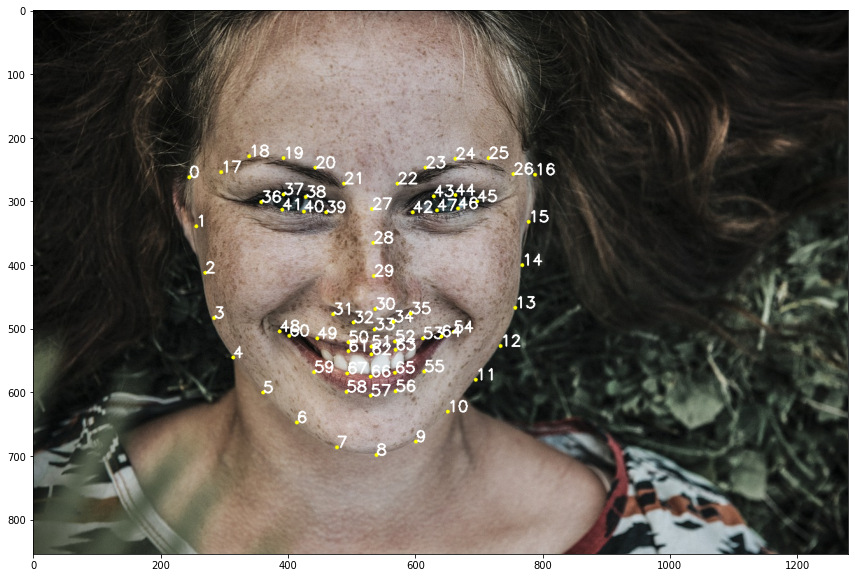

In [22]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**: 

Primeiramente, antecedendo a etapa de treinamento do modelo de liveness, iremos capturar os frames de dois videos: 
  * O primeiro video será a gravação do usuário;
  * O segundo video será a gravação do primeiro video exibido através de uma tela de celular, este será o video fake.

Obs. Os frames serão capturados pelo método "haarcascate", onde já os capturamos com a detecção de face.



Já na etapa de treinamento iremos utilizar redes neurais...

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [ ]:
#IMPLEMENTAR


### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [ ]:
#IMPLEMENTAR

### 4.3 Métricas de desempenho do modelo (2 pontos)

In [ ]:
#IMPLEMENTAR

## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

In [ ]:
#IMPLEMENTAR

>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**:

Realizamos antes de tudo o entendimento da proposta do trabalho final, e revisamos os exercicios que fizemos em sala de aula para reelembrar algumas funcoes e realizar pesquisas das quais nao sabiamos como executar. A conclusao, é que com base no layout do trabalho, conseguimos organizar os primeiros pontos de identificacao da face, e posteriormente levar isso a um modelo de treino Liveness o que sentimos maior dificuldade para aplicar pois haviamos alguns entendimentos que eram necessarios voltarmos a entender para aplicar...

Em uma nova versao, pretendemos trabalhar gradativamente para a melhoria do modelo para auxiliar grandemente a empresa na dectcção de fraude e também em outros nichos.